In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

FILE_PATH_orig = "../../SimMod_original/results/simmod_run_8p5_pulse_response"
#FILE_PATH_orig = "../results/simmod_run_8p5_pulse_response2"
FILE_PATH_new = "../results/simmod_run_8p5_pulse_response"

In [170]:
# Read in the data from SimMod_original and SimMod
data_orig = pd.read_csv(FILE_PATH_orig + ".csv", sep=',')
data_new = pd.read_csv(FILE_PATH_new + ".csv", sep=',')

# Compare the two data frames value by value
# assert data_orig.equals(data_new)
# Throws AssertionError!

diff = data_orig.values-data_new.values
max_diff = np.max(diff[~np.isnan(diff)])
print('Maximal difference: ', max_diff)

diff = data_new
for c in diff.columns:
    if c!='year':
        diff[c] = diff[c] - data_orig[c]

Maximal difference:  4.995399649487808e-09


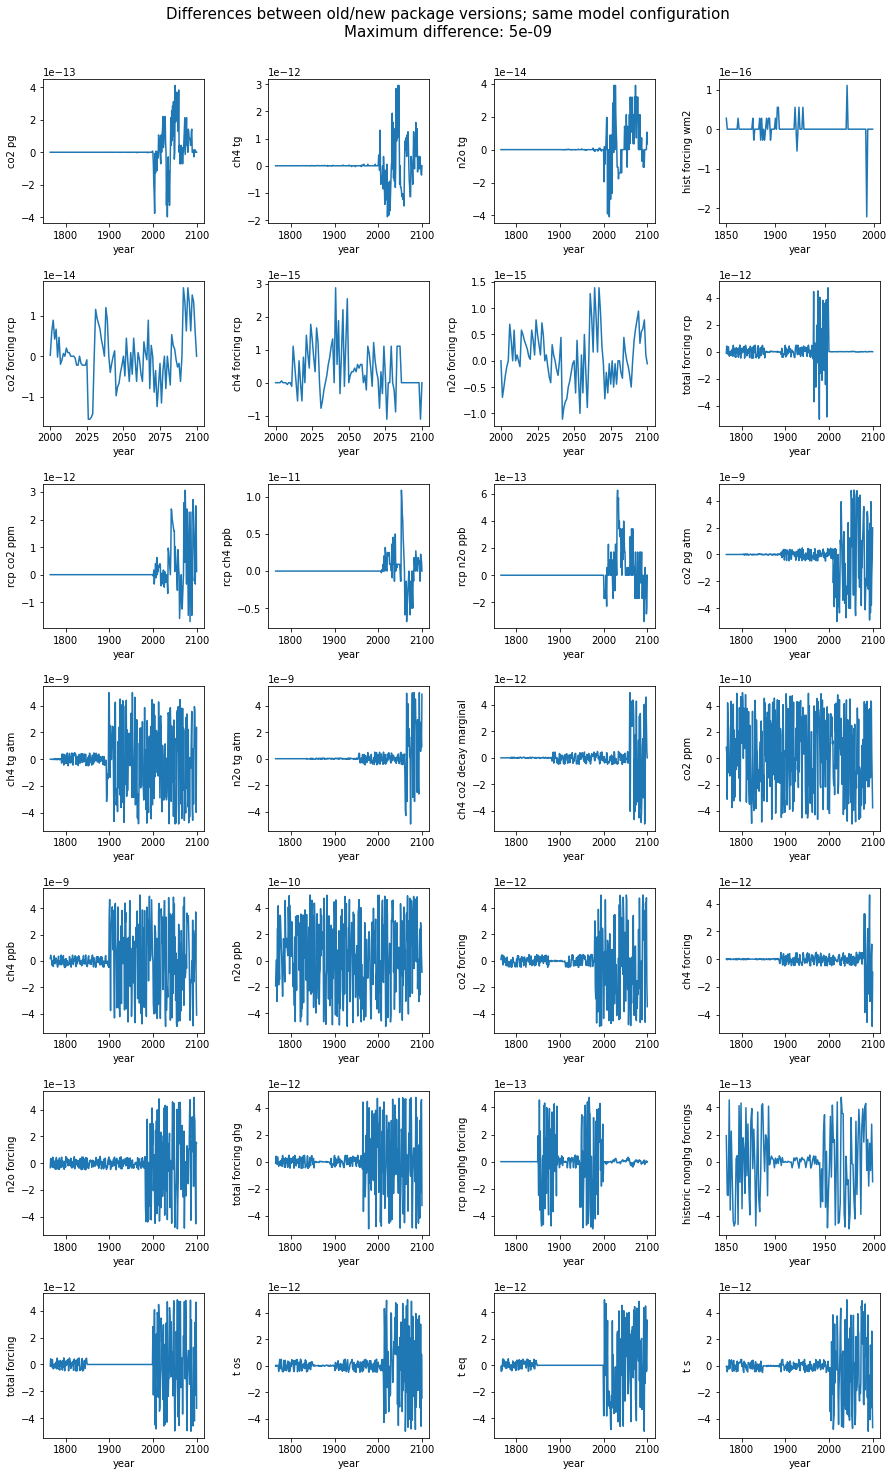

In [171]:
from eval import lineplot, lineplots_on_grid

columns_to_show = ['co2_pg', 'ch4_tg', 'n2o_tg',
       'hist_forcing_wm2', 'co2_forcing_rcp', 'ch4_forcing_rcp',
       'n2o_forcing_rcp', 'total_forcing_rcp', 'rcp_co2_ppm', 'rcp_ch4_ppb',
       'rcp_n2o_ppb', 'co2_pg_atm', 'ch4_tg_atm', 'n2o_tg_atm',
       'ch4_co2_decay_marginal', 'co2_ppm', 'ch4_ppb', 'n2o_ppb',
       'co2_forcing', 'ch4_forcing', 'n2o_forcing', 'total_forcing_ghg',
       'rcp_nonghg_forcing', 'historic_nonghg_forcings', 'total_forcing',
       't_os', 't_eq', 't_s']

fig, axes = lineplots_on_grid(diff, x_data='year', y_data=columns_to_show,
                              nrows=7, ncols=4,
                              subplot_kwargs=dict(figsize=(15,25),
                                                  gridspec_kw=dict(wspace=0.4,
                                                                   hspace=0.4))
                             )

fig.suptitle("Differences between old/new package versions; same model "
             "configuration\nMaximum difference: {:.3g}".format(max_diff),
             y=0.92, size=15)
fig.savefig("Compare_versions.pdf")